In [2]:
# Imports 
import numpy as np
from scipy.stats import norm
import math

# Parameters for call option pricing example 
r         = 0.1 #risk_free rate
S_0       = 100 #So starting price of stock
sigma     = 0.3 # standard deviation share prices
T         = 1   # time until expiry of option
K         = 110 #strike price of the option
t         = 0   # current time t
# S_T terminal stock price at time t if t = T maturity we have S_T

In [5]:
# Option pricing Brownian motion and payoff dyamics ..functions
def terminal_stock_price(S_0,r,sigma,T,Z):
    return S_0*(np.exp((r-sigma**2/2)*(T) + sigma*np.sqrt(T)*Z))

def discounted_call_payoff(r, T,S_T,K):
    return (np.exp(-r*(T))*np.maximum(S_T-K,0))

In [4]:
# Estimation Call price using Monte Carlo simulation
np.random.seed(0)

varying_sample_n = list(range(1000,51000,1000))
norm_array_per_n = [norm.rvs(size=i) for i in varying_sample_n]

terminal_value   = [terminal_stock_price(S_0,r,sigma,T,norm_array_per_n[i]) for i in range(50)]
call_values      = [discounted_call_payoff(r,T,terminal_value[i],K) for i in range(50)]
call_estimates   = [np.mean(call_values[i]) for i in range(50)]
call_std         = [np.std(call_values[i])/np.sqrt((i+1)*1000) for i in range(50)]
terminal_value

[array([179.35837329, 119.13024001, 141.71125632, 206.94191412,
        185.01512584,  78.80581764, 140.49848577, 100.96389963,
        102.43254972, 119.50398721, 110.31978199, 163.44102764,
        132.75183773, 109.58195217, 120.70253807, 116.77774165,
        165.40448659,  99.34739089, 116.05804994,  81.77253786,
         49.12034175, 128.54200841, 136.93427219,  84.5650178 ,
        208.74148515,  68.29663406, 107.11443417,  99.88455119,
        167.33603065, 164.18236914, 110.68124613, 118.34675795,
         80.95022517,  58.31919273,  95.18254186, 110.72779328,
        152.8194853 , 151.54523188,  94.06369327,  96.49385821,
         77.138638  ,  69.00402283,  63.32556568, 189.69220873,
         90.67435134,  92.64249035,  72.55403379, 133.40869253,
         65.10496618,  99.12167163,  80.76391083, 118.65746954,
         90.64299371,  74.14187821, 104.76455693, 120.14144382,
        107.78358269, 115.68971717,  87.34567814,  94.7600433 ,
         86.35200741,  94.85071528,  82.

In [84]:
# Analytical solution for European callo option to get true value
d_1 = (math.log(S_0/K) + (r + sigma**2/2)*(T-t))/sigma*math.sqrt(T-t)
d_2 = d_1 - sigma*math.sqrt(T-t)
analytic_call_price = S_0*norm.cdf(d_1)-K*math.exp(-r*(T-t))*norm.cdf(d_2)
analytic_call_price

12.131028958035898

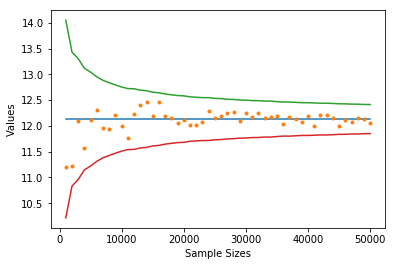

In [80]:
# Plotting the graph of estimates, actual price and confidence internal bands
import matplotlib.pyplot as plt

# Confidence interval bands
upper_CI         = [analytic_call_price + 3*call_std[i] for i in range(50)]
lower_CI         = [analytic_call_price - 3*call_std[i] for i in range(50)]

plt.plot(varying_sample_n,[analytic_call_price]*50)
plt.plot(varying_sample_n,call_estimates,'.')
plt.plot(varying_sample_n,upper_CI)
plt.plot(varying_sample_n,lower_CI)
plt.xlabel("Sample Sizes")
plt.ylabel("Values")
plt.show()
